___
# MINIPROJETO 1

## <font color='red'>Lucas Henrique Lemes Silva</font>
___

## <font color='blue'>NOME DA VARIÁVEL QUANTITATIVA ESCOLHIDA</font>

___
### Itens 1 a 3 - Resolução:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
from scipy.stats import norm
import math 
from scipy.stats import t

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Lucas\Documents\GitHub\CD\Miniprojeto1


In [2]:
Dados = pd.read_csv('Salario1.csv', sep=',')

Dados = Dados[(~Dados.Employee_Annual_Salary.isnull())]

Dados.Employee_Annual_Salary

Dados.Employee_Annual_Salary.describe()

count     32062.000000
mean      80204.178634
std       25098.329868
min           0.960000
25%       72862.400000
50%       84450.000000
75%       93240.000000
max      300000.000000
Name: Employee_Annual_Salary, dtype: float64

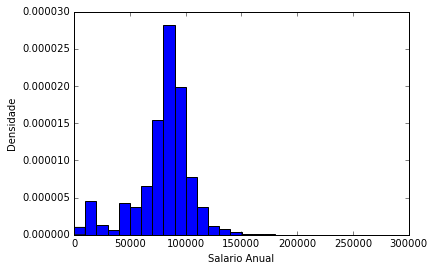

In [3]:
ut1 = Dados.Employee_Annual_Salary

plt.hist(ut1, bins = range(90,300000,10000), normed = 1)
plt.ylabel("Densidade")
plt.xlabel("Salario Anual")
plt.show()

Histograma Simetrico

Modelos Probabilisticos: Normal; T

Escolhi esses dois modelos probabilísticos acima, pois eles são utilizados na estatística para ajustar dados com uma distribuição simétrica, assim como o histograma acima.


___
### Itens 4 a 6 - Resolução:

In [4]:
#parametros da normal

u = np.mean(ut1)
print(u)

desv = np.std(ut1)
print(desv)

A = stats.norm.fit(ut1)
print(A)

par = stats.t.fit(ut1)
print(par)

80204.178633899
25097.938461397865
(80204.178633896823, 25097.938461397222)
(0.1019641237067129, 84450.000089057619, 1.6802785323549867)


In [5]:
#parametros de t

par = stats.t.fit(ut1)
print(par)


(0.1019641237067129, 84450.000089057619, 1.6802785323549867)


___
### Itens 7 a 9 - Resolução:

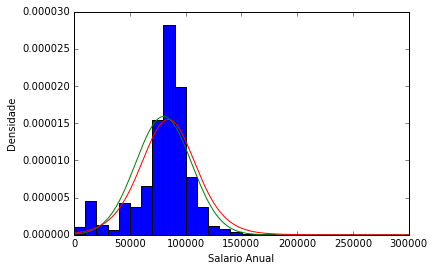

In [6]:
ut1 = sorted(ut1)

normal = norm.pdf(ut1, loc=u, scale=desv)

T = t.pdf (ut1, 10, loc = par[1], scale = desv)

plt.hist(ut1, bins = range(90,300000,10000), normed = 1)
plt.ylabel("Densidade")
plt.xlabel("Salario Anual")
plt.plot(ut1, normal)
plt.plot(ut1, T)
plt.show()

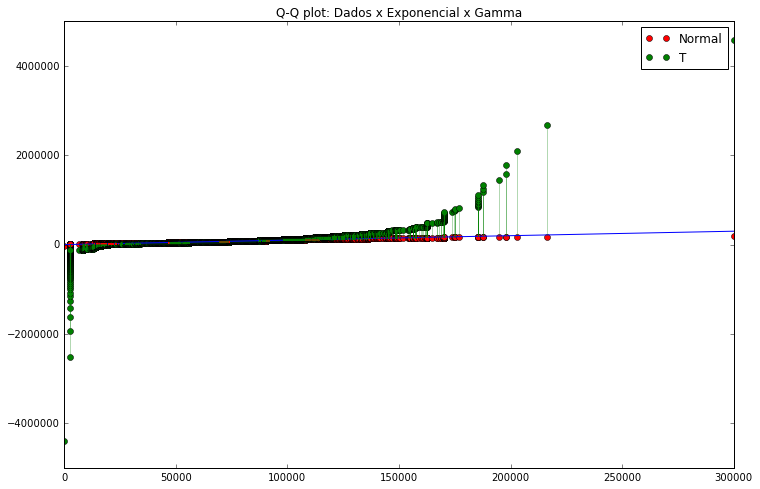

In [7]:
fra = [] # frequencia relativa acumulada
for i in range(len(ut1)):
    acc = (i + 0.5) / len(ut1)
    if acc < 0:
        acc = 0
    fra.append(acc) # ver Magalhães e Lima (pag. 195)

# Convertemos fra em uma Series do Pandas
fra = pd.Series(data=fra)

# Gera os valores dos quantis teóricos para as distribuições analisadas
q_norm = stats.norm.ppf(fra, loc=u, scale=desv) # quantis teóricos da normal
q_t = stats.t.ppf(fra, 2, loc = par[1], scale = desv)


fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x Exponencial x Gamma")

norm_plot, = plt.plot(ut1, q_norm, 'o', color="red", label="Normal")
t_plot, = plt.plot(ut1, q_t, 'o', color="green", label = "T")

plt.legend(handles=[norm_plot, t_plot])
plt.plot((min(ut1), max(ut1)), (min(ut1), max(ut1)), '-')


for i in range(len(ut1)):
    plt.plot((ut1[i], ut1[i]), (q_norm[i], ut1[i]), '-', color='red', alpha=0.3  )
    plt.plot((ut1[i], ut1[i]), (q_t[i], ut1[i]), '-', color='green', alpha=0.3  )

Atraves do gráfico acima, pode-se perceber que o modelo teorico que melhor se ajustou com os dados reais do salario da população de Chicago foi a distribuição normal, pois seus pontos no grafico acima(vermelhos) ficaram mais proximos da reta dos dados reais.

___
### Itens 10 e 11 - Resolução:

In [8]:
q_norm1 = []
for i in range(1,32062):
    q_norm1.append(q_norm[i])
    
#print(q_norm1[0])

q_t1 = []
for i in range(1,32062):
    q_t1.append(q_t[i])
    
#print(q_t1[0])

ut2 = []
for i in range(1,32062):
    ut2.append(ut1[i])
    
    
q_norm1 = np.array(q_norm1)
q_t1 = np.array(q_t1)


## Erro quadratico

In [9]:
erro_quadratico_norm = sum((ut2 - q_norm1)**2)
erro_quadratico_t = sum((ut2 - q_t1)**2)

print("Erro quadrático da normal :{:4.3f}\n".format(erro_quadratico_norm))
print("Erro quadrático da T :{:4.3f}\n".format(erro_quadratico_t))

Erro quadrático da normal :1548716691777.631

Erro quadrático da T :116346136459636.375



## Erro quadratico médio

In [10]:
eqm_norm = erro_quadratico_norm/len(ut2)
eqm_t = erro_quadratico_t/len(ut2)

print("Erro quadratico médio da Normal :", eqm_norm)
print("Erro quadratico médio da T :", eqm_t)

Erro quadratico médio da Normal : 48305314.6121
Erro quadratico médio da T : 3628899175.31


## Soma das diferenças

In [11]:
soma_diferenças_norm = sum(abs(ut2 - q_norm1))
soma_diferenças_t = sum(abs(ut2 - q_t1))

print("Soma de diferenças da Normal :", soma_diferenças_norm)
print("Soma de diferenças da T :", soma_diferenças_t)

Soma de diferenças da Normal : 185395119.865
Soma de diferenças da T : 573042342.826


## Teste de aderencia acumulativa

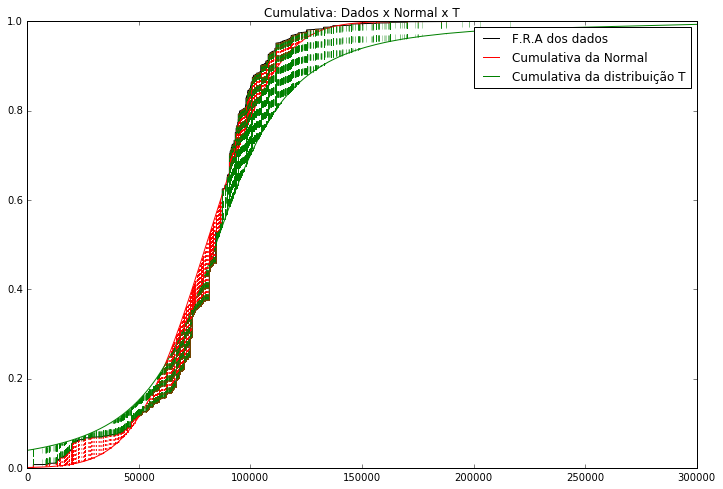

In [12]:
cdf_norm = stats.norm.cdf(ut1,loc=u, scale=desv)
cdf_t = stats.t.cdf(ut1, 2, loc = 84450.000089057619, scale = desv)


fig = plt.figure(figsize=(12,8))

plt.title("Cumulativa: Dados x Normal x T")

dados_fra_plot, = plt.plot(ut1, fra, '-', color='black', label="F.R.A dos dados")
cdf_norm_plot,   = plt.plot(ut1, cdf_norm, '-', color='red', label = "Cumulativa da Normal")
cdf_t_plot, = plt.plot(ut1, cdf_t, '-', color='green', label = "Cumulativa da distribuição T")

plt.legend(handles=[dados_fra_plot, cdf_norm_plot, cdf_t_plot])


for i in range(len(ut1)):
    plt.plot((ut1[i], ut1[i]), (fra[i], cdf_norm[i]), ':', color="red", alpha=0.3)
    #Omitido para não poluir muito o gráfico
    plt.plot((ut1[i], ut1[i]), (fra[i], cdf_t[i]), '--', color="green", alpha=0.3)

## Erro quadrático na cdf

In [13]:
erro_quad_cdf_norm = sum((fra - cdf_norm)**2)

erro_quad_cdf_t = sum((fra - cdf_t)**2)

print("Erro quadrático da CDF da Normal versus F.R.A:", erro_quad_cdf_norm)
print("Erro quadrático da CDF da T versus F.R.A:", erro_quad_cdf_t)

Erro quadrático da CDF da Normal versus F.R.A: 154.90403593
Erro quadrático da CDF da T versus F.R.A: 247.384147862


## Diferenças absolutas

In [14]:
soma_difs_cdf_norm = sum( abs(fra - cdf_norm))
soma_difs_cdf_t = sum( abs(fra - cdf_t))

print("Erro da soma do módulo das diferenças da Normal versus F.R.A: {0} \nErro da soma do módulo das diferenças da T versus F.R.A: {1}".format(soma_difs_cdf_norm, soma_difs_cdf_t))

Erro da soma do módulo das diferenças da Normal versus F.R.A: 1892.0411983298457 
Erro da soma do módulo das diferenças da T versus F.R.A: 2385.2672214721215


In [ ]:
#ut10 = pd.crosstab(ut1, normal)
#ut11 = pd.crosstab(ut1, t)

#esse codigo acima esta travando o meu computador, e seria o grafico da tabela final. Vou tentar plotar ele com mais calma depois, por enquanto nao esotu conseguindo resolver o problema de travar  ocomputador.

 ## Conclusão

Através de todas as análises feitas com o teste de aderencia e os dois graficos acima, pode-se concluir que o modelo probabilistico teorico mais adequado para ajustar os dados acima foi o modelo normal pois a função ajustada por ele se aproximaram bastante dos dados reais. Com isso pode-se calcular de maneira mais eficiente a probabilidade de se encontrar salarios dentre os dados reais da população de Chicago.